# **Task 03**
Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report,confusion_matrix




In [3]:
df=pd.read_csv("./bank-direct-marketing-campaigns.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:xlabel='job', ylabel='count'>

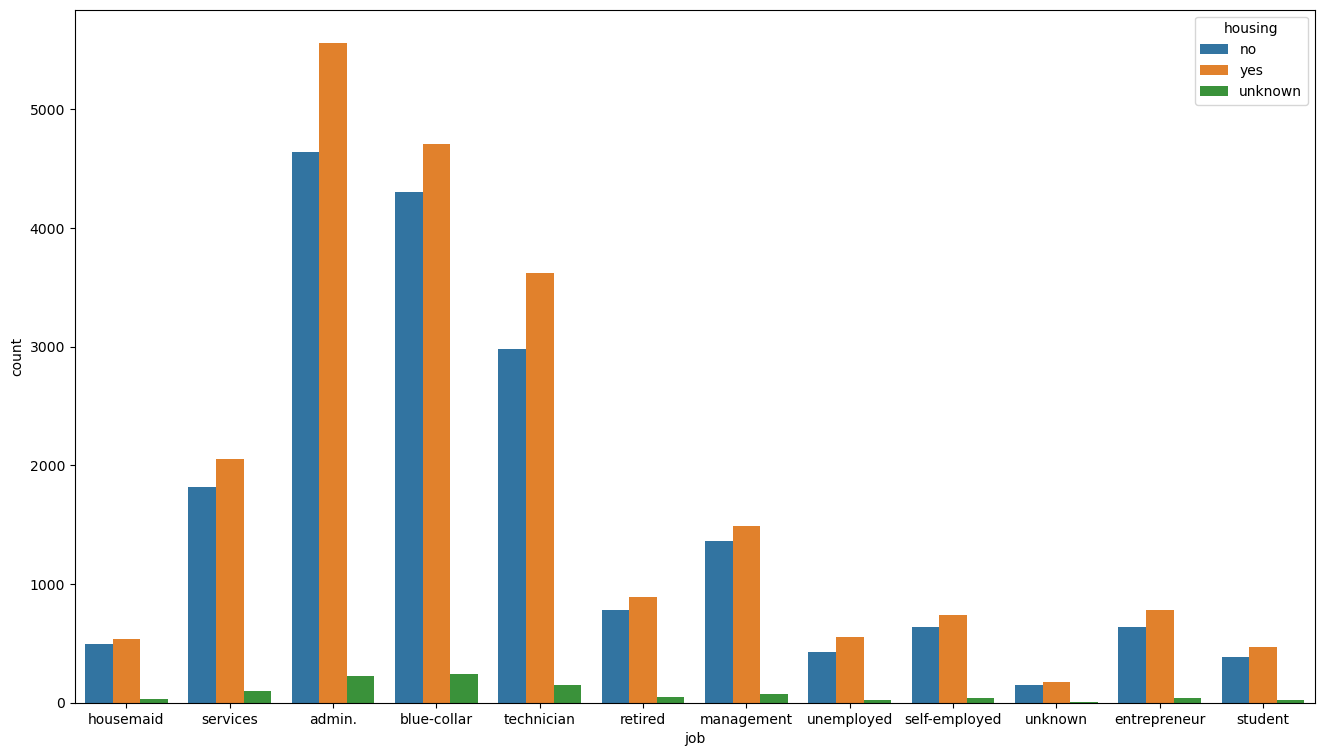

In [5]:
plt.figure(figsize = (16,9))
sns.countplot(x = "job",data = df,hue="housing")

<AxesSubplot:xlabel='marital', ylabel='count'>

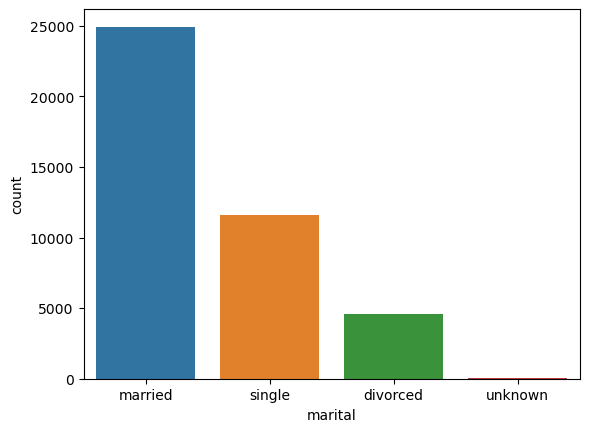

In [6]:
sns.countplot(x = "marital",data = df)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'unknown'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'illiterate')])

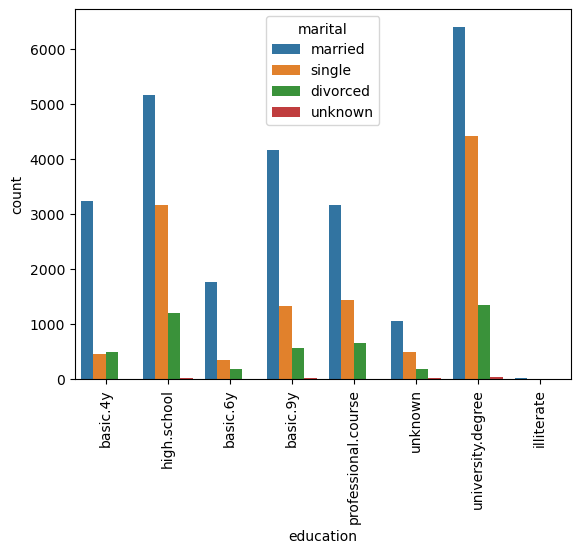

In [7]:
sns.countplot(x = "education",data = df,hue="marital")
plt.xticks(rotation = 90)



<AxesSubplot:>

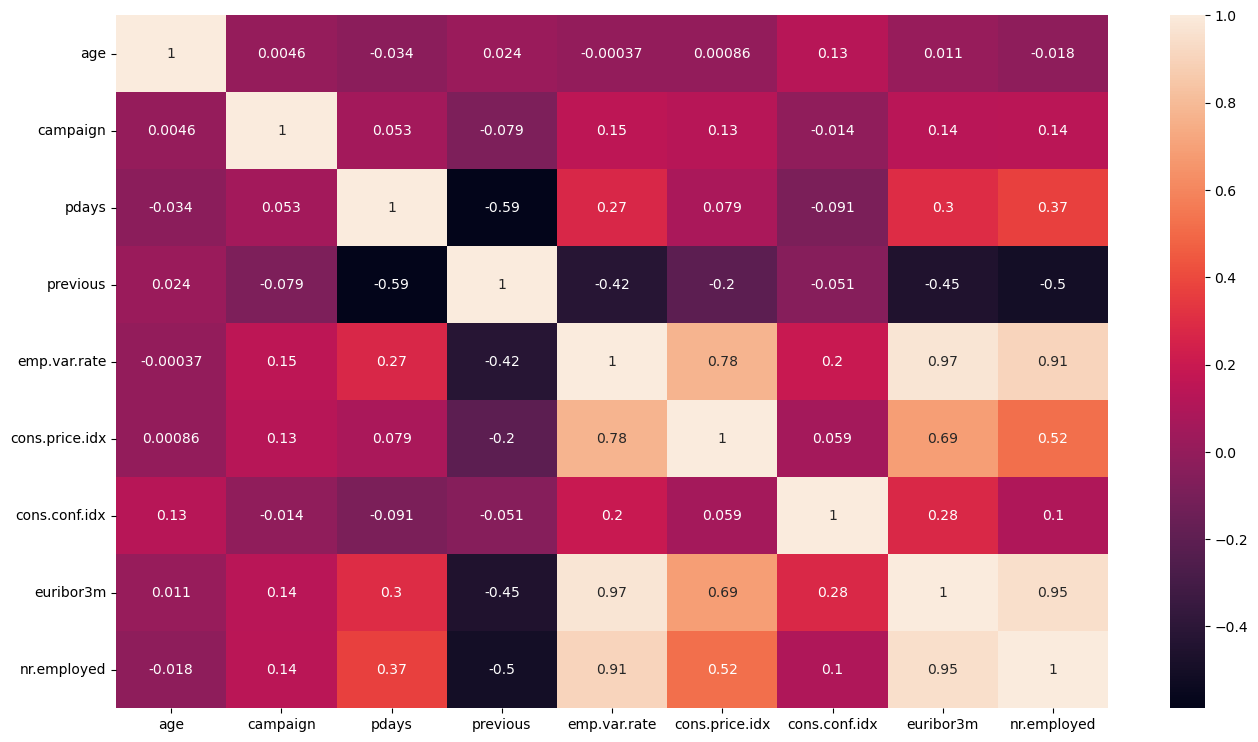

In [8]:
df.corr()
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(),annot = True)

In [9]:
# Initialize LabelEncoder
label_encoder=LabelEncoder()
# Encode categorical variables using LabelEncoder
df.job=label_encoder.fit_transform(df.job)
df.marital=label_encoder.fit_transform(df.marital)
df.job=label_encoder.fit_transform(df.job)
df.education=label_encoder.fit_transform(df.education)
df.housing=label_encoder.fit_transform(df.housing)
df.loan=label_encoder.fit_transform(df.loan)
df.contact=label_encoder.fit_transform(df.contact)
df.month=label_encoder.fit_transform(df.month)
df.default=label_encoder.fit_transform(df.default)
df.day_of_week	=label_encoder.fit_transform(df.day_of_week	)
df.poutcome=label_encoder.fit_transform(df.poutcome)



In [10]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,yes


In [11]:

# Separating features (X) and target variable (y)
# X contains the features by dropping the column labeled 'y'
X = df.drop(['y'], axis=1)
# y contains only the target variable ('y' column)
y = df['y']
# Splitting the data into training and testing sets using a 80-20 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
# Printing the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(32950, 19) (8238, 19) (32950,) (8238,)


From the codes and output above, we can see that the train dataset contains 32950 rows while the test dataset contains 8238 rows. In other words, the dataset has been split into 4:1 ratio,as test_size parameter in train_test_split() function is 0.2.

In [12]:
# Create a Decision Tree Classifier with a fixed random state for reproducibility
model = DecisionTreeClassifier(random_state=13)
# Train (fit) the model using the training data (X_train and y_train)
model.fit(X_train, y_train)
# Use the trained model to predict the target variable for the test features (X_test)
predicted = model.predict(X_test)


The codes above contain several functions.We first created a model using DecisionTreeClassifier() function.Then we trained this model with the train dataset using fit(), and with this trained model, we predicted the values using predict()

In [13]:
accuracy = accuracy_score(predicted, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8401310997815004


Here we checked whether the predicted values are matching actual values well using accuracy_score().

In [14]:
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

          no       0.92      0.90      0.91      7315
         yes       0.32      0.37      0.34       923

    accuracy                           0.84      8238
   macro avg       0.62      0.63      0.63      8238
weighted avg       0.85      0.84      0.85      8238



In [15]:
# X_train and y_train represent your training features and labels
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# New random data for prediction (example data)
new_data = pd.DataFrame({
    'age': [30],
    'job': ['management'],
    'marital': ['married'],
    'education': ['university.degree'],
    'default': ['no'],
    'housing': ['yes'],
    'loan': ['no'],
    'contact': ['cellular'],
    'month': ['may'],
    'day_of_week': ['mon'],
    'campaign': [1],
    'pdays': [999],
    'previous': [0],
    'poutcome': ['nonexistent'],
    'emp.var.rate': [1.1],
    'cons.price.idx': [93.994],
    'cons.conf.idx': [-36.4],
    'euribor3m': [4.857],
    'nr.employed': [5191.0],
})

# Apply the same encoding used during training
label_encoder = LabelEncoder()
new_data_encoded = new_data.apply(label_encoder.fit_transform)

# Make predictions on the new data
predictions = clf.predict(new_data_encoded)

# Display the predictions
print(predictions)


['yes']
